# Data Collection

Data Collection Methods

1. Web Scraping
2. API
3. Manual Data Collection

### Web Scraping

In [ ]:
https://www.indeed.com/jobs?q=Software Engineer&l=San Francisco, CA&from=searchOnHP&vjk=6403113ebe0cd74a

post_name = 'ML Engineer'
location = 'Vienna'

# url = "https://www.indeed.com/jobs?q=Data+Scientist&l=Vienna&from=searchOnHP&vjk=bcf26391e79f6c9a"
url = f"https://www.indeed.com/jobs?q={post_name}&l={location}&from=searchOnHP&vjk=bcf26391e79f6c9a"
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

# titles = soup.find_all('h2', {'class': 'jobTitle'})

# for title in titles:
#     print(title.text)

# company_location = soup.find_all(attrs={'data-testid': 'company-name'})

# for company in company_location:
#     print(company.text)

jobs = soup.find_all('td', {'class': 'resultContent'})

data_scientist_jobs = []

for job in jobs:
    job_title = job.find('h2', {'class': 'jobTitle'})
    company_name = job.find(attrs={'data-testid': 'company-name'})
    location = job.find(attrs={'data-testid': 'text-location'})

    # create a dictionary to store the job details
    job_details = {
        'title': job_title.text,
        'company': company_name.text,
        'location': location.text
    }

    data_scientist_jobs.append(job_details)

# create data frame
import pandas as pd

df = pd.DataFrame(data_scientist_jobs)

df.head()

In [ ]:
df.to_csv('data_scientist_jobs.csv', index=False)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_job_details(job):
    """Extract job details from a job posting."""
    job_title = job.find('h2', {'class': 'jobTitle'})
    company_name = job.find(attrs={'data-testid': 'company-name'})
    location = job.find(attrs={'data-testid': 'text-location'})

    # create a dictionary to store the job details
    job_details = {
        'title': job_title.text,
        'company': company_name.text,
        'location': location.text
    }

    return job_details

def get_jobs(post_name, location):
    """Fetch job postings from Indeed.com."""
    url = f"https://www.indeed.com/jobs?q={post_name}&l={location}&from=searchOnHP&vjk=bcf26391e79f6c9a"
    headers = {'User-Agent': 'Mozilla/5.0'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    jobs = soup.find_all('td', {'class': 'resultContent'})
    job_details = []

    for job in jobs:
        job_details.append(get_job_details(job))

    return job_details

get_jobs('Data Scientist', 'Vienna')

### API

In [ ]:
import requests
import json

# Define the URL of the API
url = "https://api.github.com/users/octocat"

# Send a GET request to the API
response = requests.get(url)

# If the request was successful, the status code will be 200
if response.status_code == 200:
    # Load the data from the response
    data = json.loads(response.text)

    # Print the data
    print(json.dumps(data, indent=4))
else:
    print("Failed to get data:", response.status_code)

In [ ]:
url = "https://api.github.com/users/meftaul/repos"

# get the response
response = requests.get(url)

# load the data
data = json.loads(response.text)

# get full_name as list
full_names = [repo['full_name'] for repo in data]

full_names

In [ ]:
# a method that fetches the repositories of a user

def get_repositories(username):
    """Fetch the repositories of a user from GitHub."""
    url = f"https://api.github.com/users/{username}/repos"
    response = requests.get(url)
    data = json.loads(response.text)
    full_names = [repo['full_name'] for repo in data]
    return full_names

get_repositories('meftaul')

# Feature Selection

Benefits of Feature Selection

1. Reduces training time
2. Reduces the risk of overfitting
3. Increase model performance

- Filter Methods
    1. ANOVA F-value
    2. Variance Threshold
    3. Mutual Information
- Wrapper Methods
    1. Recursive Feature Elimination
    2. Forward Selection
    3. Backward Elimination

- Embedded Methods
    1. Lasso Regression
    2. Ridge Regression
    3. Decision Trees
    4. Random Forest

### Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 01. ANOVA F-value

Estimates the degree of linearity between input and output features.

In [4]:
from sklearn.feature_selection import f_classif, f_regression

# Perform ANOVA F-test
f_scores, p_values = f_classif(X_data, y_data)

# Create a DataFrame to display the results
anova_results = pd.DataFrame({'Feature': feature_names, 'F-Score': f_scores, 'P-Value': p_values})

anova_results

,Feature,F-Score,P-Value
0,sepal length (cm),119.264502,1.669669e-31
1,sepal width (cm),49.160040,4.492017e-17
2,petal length (cm),1180.161182,2.856777e-91
3,petal width (cm),960.007147,4.169446e-85


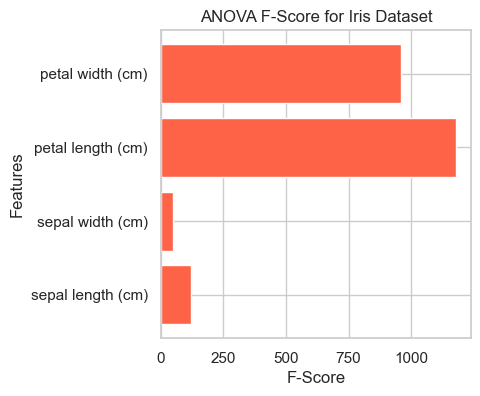

In [5]:
plt.figure(figsize=(4,4))
plt.barh(anova_results['Feature'], anova_results['F-Score'], color='tomato')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.title('ANOVA F-Score for Iris Dataset')
plt.show()

### 02. Variance Thereshold

Removes features with low variance. Disadvantage is that it does not consider the relationship between features.

In [6]:
import select
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold() # By default, it removes features with zero variance
selector.fit_transform(X_data)

for feature, variance in zip(feature_names, selector.variances_):
    print(f"{feature}: {variance}")

sepal length (cm): 0.6811222222222222
sepal width (cm): 0.1887128888888887
petal length (cm): 3.0955026666666674
petal width (cm): 0.5771328888888888


In [7]:
selector = VarianceThreshold(threshold=0.2)
X_data_selected = selector.fit_transform(X_data)

X_data_selected.shape

(150, 3)

### 03. Mutual Information

Estimates the mutual information between input and output features. Unlike ANOVA F-value, mutual information can capture non-linear relationships between input and output feature.

In [8]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

mi_score = mutual_info_classif(X_data, y_data)
mi_results = pd.DataFrame({'Feature': feature_names, 'MI-Score': mi_score})
mi_results


,Feature,MI-Score
0,sepal length (cm),0.494774
1,sepal width (cm),0.252629
2,petal length (cm),0.997764
3,petal width (cm),0.990934


Selector object

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

selector = SelectKBest(score_func=chi2, k=3)
X_data_selected = selector.fit_transform(X_data, y_data)

print(X_data.columns[selector.get_support()])

print(selector.scores_)

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


### 04. Exhaustive Feature Selector

Find the best subset of features for a given model.

In [ ]:
! pip install mlxtend

In [13]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

efs = EFS(estimator=lr, 
          min_features=1, 
          max_features=3, 
          scoring='accuracy', 
          cv=5)

X_data_new = efs.fit_transform(X_data, y_data)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', X_data.columns[list(efs.best_idx_)])

print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Features: 14/14

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
Number of features before transformation: 4
Number of features after transformation: 3


In [14]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


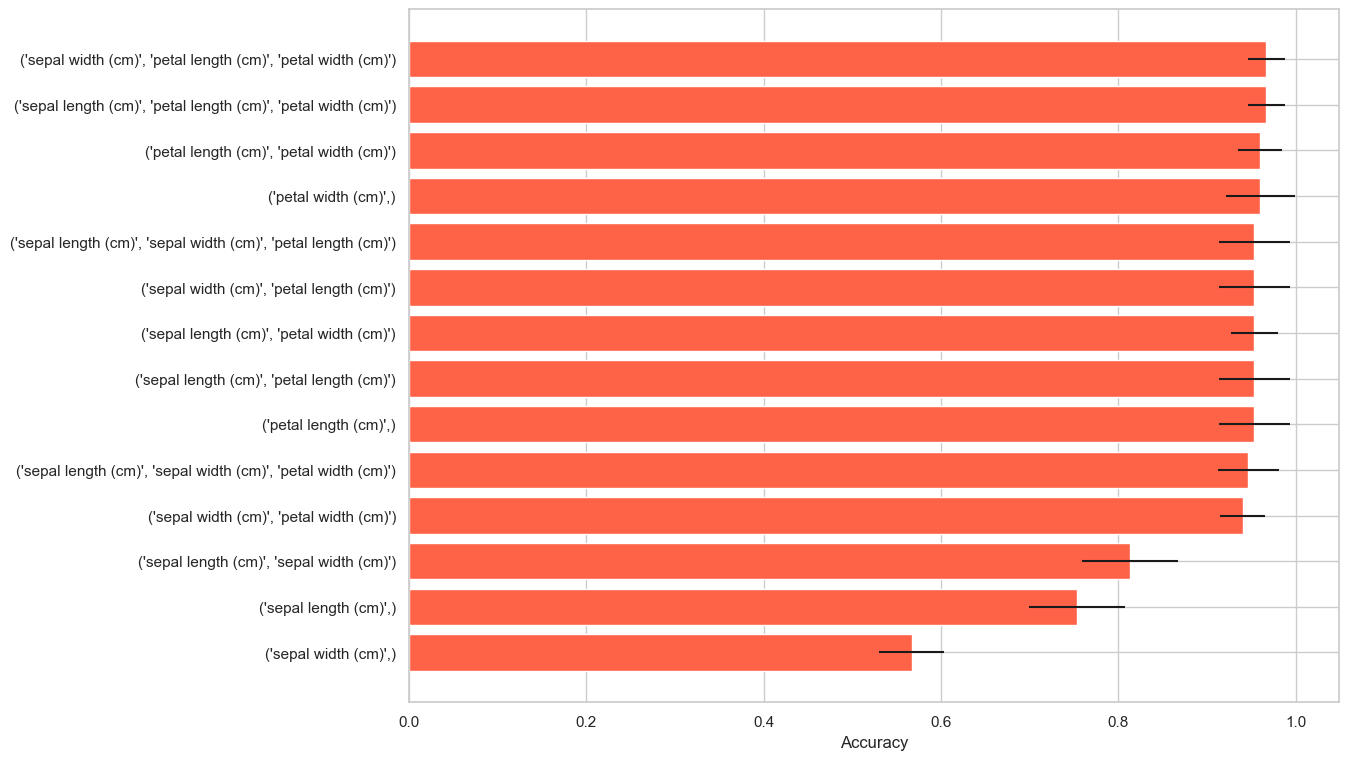

In [15]:
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, 
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

### 05. Sequential Feature Selector

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 

Best accuracy score: 0.97
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


In [17]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."


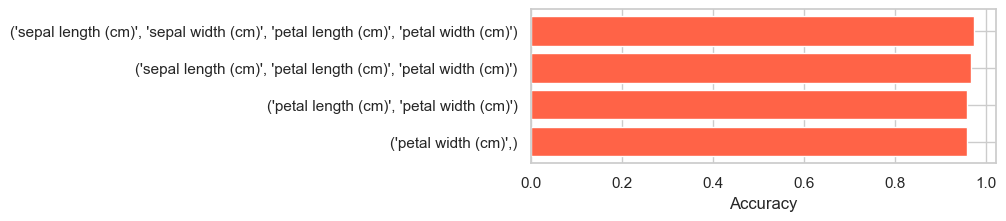

In [18]:
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

### 06. Sequential Backward Selector

In [20]:

lr = LogisticRegression()

# Create an SBS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 3),  # Consider any feature combination between 1 and 4
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SBS with our dataset
sbs = sbs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names 

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


### 07. Embedded Methods

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy', random_state=42)

rfc.fit(X_data, y_data)

for feature, importance in zip(feature_names, rfc.feature_importances_):
    print(f"{feature}: {importance}")

sepal length (cm): 0.10272503598695566
sepal width (cm): 0.023699095255288995
petal length (cm): 0.43518700420970513
petal width (cm): 0.4383888645480503
